In [1]:
# Taylor Hurt
# https://www.kaggle.com/mishra5001/credit-card?select=application_data.csv 
# import modules/libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn as sk

In [2]:
# create pandas dataframe
CCData = pd.read_csv('application_data.csv')

# drop irrelevant attributes
CCData.drop(columns=['FLAG_MOBIL',
                           'FLAG_EMP_PHONE',
                           'FLAG_WORK_PHONE',
                           'FLAG_CONT_MOBILE',
                           'FLAG_PHONE',
                            'FLAG_EMAIL','CODE_GENDER','SK_ID_CURR'],inplace=True)

# drop irrelevant attributes about where the applicant lives
MODE_cols = [col for col in CCData.columns if '_MODE' in col]
CCData.drop(columns = MODE_cols,inplace=True)
MEDI_cols = [col for col in CCData.columns if '_MEDI' in col]
CCData.drop(columns = MEDI_cols,inplace=True)
AVG_cols = [col for col in CCData.columns if '_AVG' in col]
CCData.drop(columns = AVG_cols,inplace=True)


# drop binary flag_documents colums [do not know which documents these are and is a redundant attribute]
flag_docs = [col for col in CCData.columns if 'FLAG_DOCUMENT_' in col]
CCData.drop(columns=flag_docs, inplace=True)


In [3]:
# view columns with null values 
col_with_nullvalues=CCData.isnull().sum()/len(CCData)*100
col_with_nullvalues.sort_values(ascending=False)


OWN_CAR_AGE                    65.990810
EXT_SOURCE_1                   56.381073
OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
REG_REGION_NOT_WORK_REGION      0.000000
ORGANIZATION_TYPE               0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
REG_CITY_NOT_WORK_CITY          0.000000
REG_CITY_NOT_LIV

In [4]:
col_with_nullvalues = list(col_with_nullvalues[col_with_nullvalues.values>=30.0].index)
CCData.drop(labels=col_with_nullvalues,axis=1,inplace=True)

In [5]:
print(CCData.isnull().sum()/len(CCData)*100)
print(CCData.info())

TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
CNT_FAM_MEMBERS                 0.000650
REGION_RATING_CLIENT            0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
REG_REGION_NOT_L

In [6]:
# change negative values to absolute values 
CCData['DAYS_BIRTH'] = abs(CCData['DAYS_BIRTH'])
CCData['DAYS_ID_PUBLISH'] = abs(CCData['DAYS_ID_PUBLISH'])
CCData['DAYS_EMPLOYED'] = abs(CCData['DAYS_EMPLOYED'])
CCData['DAYS_REGISTRATION'] = abs(CCData['DAYS_REGISTRATION'])

# sort dataframe by Dtype

cols_float64 = CCData.select_dtypes('float64')
cols_float64list = cols_float64.columns.tolist()

cols_int64 = CCData.select_dtypes(include='int64')
cols_int64list = cols_int64.columns.tolist()

cols_object = CCData.select_dtypes(include='object')
cols_objectlist = cols_object.columns.tolist()

cols_float64 = cols_float64list 
cols_int64 = cols_int64list 
cols_object = cols_objectlist 

CCData_float64 = CCData[cols_float64]

CCData_int64 = CCData[cols_int64]

CCData_object = CCData[cols_object]

CCData_object.isnull().sum().sum()
 



1292

In [7]:
## Fill null values
CCData_float64_fill = CCData_float64.fillna(value = CCData_float64.mean())
print(CCData_float64_fill.isnull().sum().sum())

print(CCData_int64.isnull().sum().sum())

# combine the three dataframes

CCData_combined = pd.concat([CCData_float64_fill, CCData_object, CCData_int64],axis=1)


# Drow Rows with null values

CCData_no_missing = CCData_combined.dropna()
CCData_no_missing.info()



0
0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 306219 entries, 0 to 307510
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   AMT_INCOME_TOTAL             306219 non-null  float64
 1   AMT_CREDIT                   306219 non-null  float64
 2   AMT_ANNUITY                  306219 non-null  float64
 3   AMT_GOODS_PRICE              306219 non-null  float64
 4   REGION_POPULATION_RELATIVE   306219 non-null  float64
 5   DAYS_REGISTRATION            306219 non-null  float64
 6   CNT_FAM_MEMBERS              306219 non-null  float64
 7   EXT_SOURCE_2                 306219 non-null  float64
 8   EXT_SOURCE_3                 306219 non-null  float64
 9   OBS_30_CNT_SOCIAL_CIRCLE     306219 non-null  float64
 10  DEF_30_CNT_SOCIAL_CIRCLE     306219 non-null  float64
 11  OBS_60_CNT_SOCIAL_CIRCLE     306219 non-null  float64
 12  DEF_60_CNT_SOCIAL_CIRCLE     306219 non-null  float64


In [8]:
# convert categorical variables into dummy variables
# create dummy variablies form CCData_clean
dummy = pd.get_dummies(CCData_no_missing.select_dtypes('object'))
# combine the dummy variables with CCData_clean
CCData_concat = pd.concat([CCData_no_missing, dummy], axis=1)
# drop object datatypes for numerical Data Frame
CCData_numerical = CCData_concat.select_dtypes(exclude='object')
CCData_numerical.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,202500.0,406597.5,24700.5,351000.0,0.018801,3648.0,1.0,0.262949,0.139376,2.0,...,0,0,0,0,0,0,0,0,0,0
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,1186.0,2.0,0.622246,0.510853,1.0,...,0,0,0,0,0,0,0,0,0,0
2,67500.0,135000.0,6750.0,135000.0,0.010032,4260.0,1.0,0.555912,0.729567,0.0,...,0,0,0,0,0,0,0,0,0,0
3,135000.0,312682.5,29686.5,297000.0,0.008019,9833.0,2.0,0.650442,0.510853,2.0,...,0,0,0,0,0,0,0,0,0,0
4,121500.0,513000.0,21865.5,513000.0,0.028663,4311.0,1.0,0.322738,0.510853,0.0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# import train_test_split from sklearn.model_selection
# https://www.pluralsight.com/guides/machine-learning-neural-networks-scikit-learn 

from sklearn.model_selection import train_test_split


# declare target variable
target_column = ['TARGET']
predictors = list(set(list(CCData_numerical))-set(target_column))
# normalize the predictors
"""should this be normalized?"""

# CCData_numerical[predictors] = CCData_numerical[predictors]/CCData_numerical[predictors].max()

# define x and y
X = CCData_numerical[predictors].values
y = CCData_numerical[target_column].values


# split data for training and testing 80/20, random state = 25 for fixed shuffling of the 80/20 split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state = 25)

print(X_train.shape)
print(X_test.shape)


(244975, 135)
(61244, 135)


In [10]:
# import neural netowrk from sklearn
from sklearn.neural_network import MLPClassifier, MLPRegressor

# import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error, r2_score

# import sqrt from math
from math import sqrt


mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [11]:
# evalualte the performance of the training data
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train, predict_train))
print(classification_report(y_train,predict_train))

[[225221      0]
 [ 19753      1]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    225221
           1       1.00      0.00      0.00     19754

    accuracy                           0.92    244975
   macro avg       0.96      0.50      0.48    244975
weighted avg       0.93      0.92      0.88    244975



In [13]:
# evaluate the performance of the test data
print(confusion_matrix(y_test, predict_test))
print(classification_report(y_test, predict_test))

[[56243     0]
 [ 5001     0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56243
           1       0.00      0.00      0.00      5001

    accuracy                           0.92     61244
   macro avg       0.46      0.50      0.48     61244
weighted avg       0.84      0.92      0.88     61244



In [14]:
# remove outliers for the float64 dtype
def outlier_compare_charts(var, percentile):
   
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,8))
    s1=sns.boxplot(ax=ax1,y=CCData[var],data=CCData,x=CCData['TARGET'])
    s1.set_title("With_Outliers", fontsize=10)
    s1.set_ylabel('%s' %var)
    
    s2=sns.boxplot(ax=ax2,x=CCData['TARGET'],y=CCData[CCData[var]<np.nanpercentile(CCData[var], percentile)][var]);
    s2.set_title(var + ' boxplot on data within '+ str(percentile) +' percentile');
    s2.set_ylabel('%s' %var)

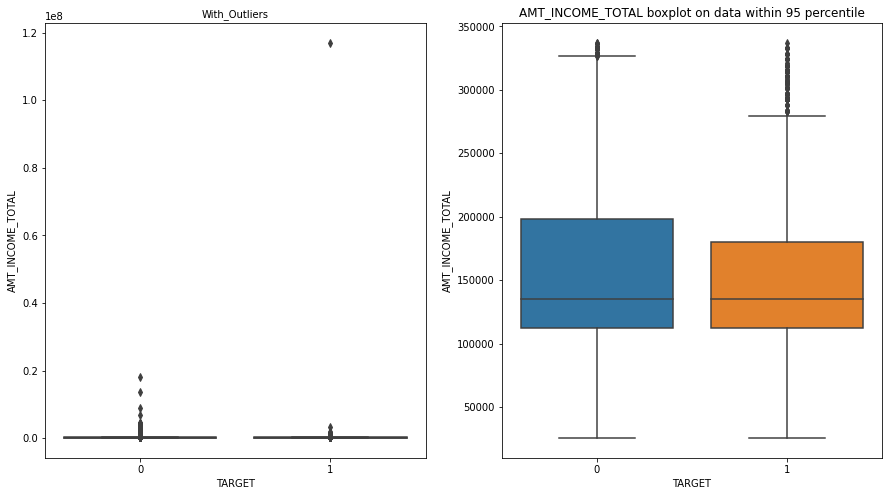

In [101]:
outlier_compare_charts('AMT_INCOME_TOTAL', 95)